     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 111.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total headlines: 209527
Unique categories: 42
Sample original headline:
 What If We Were All Family Generation Changers?
After preprocessing:
 family generation changer
Top 10 words: [('trump', 325), ('photo', 301), ('new', 211), ('get', 145), ('say', 144), ('make', 142), ('day', 141), ('video', 138), ('woman', 133), ('good', 125)]
TF-IDF feature matrix shape: (5000, 5000)


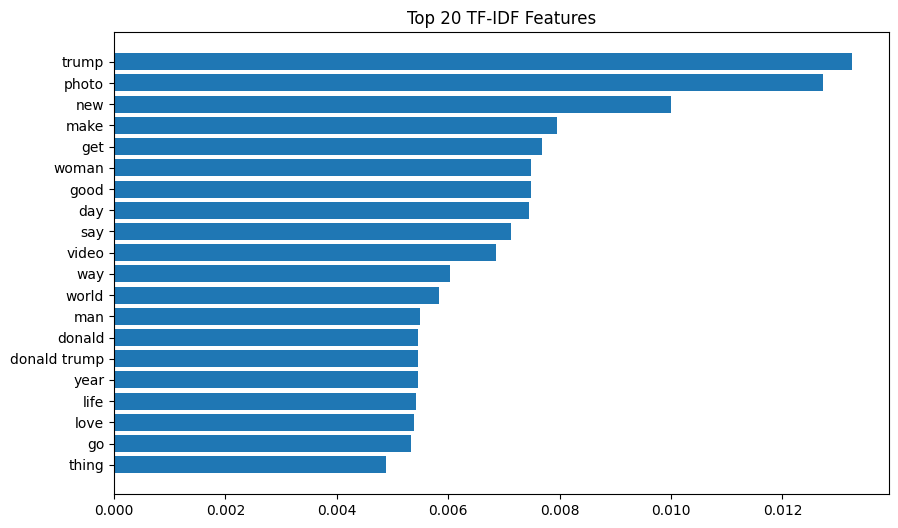


Tokens and POS tags:
What PRON
If SCONJ
We PRON
Were AUX
All DET
Family PROPN
Generation PROPN
Changers PROPN
? PUNCT

Named Entities:


In [5]:
# Install necessary libraries
!pip install spacy --quiet
!python -m spacy download en_core_web_sm --quiet
!pip install nltk --quiet

import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('stopwords')

# Load dataset (Upload JSON file manually in Colab)
df = pd.read_json("/content/News_Category_Dataset_v3.json", lines=True)


print("Total headlines:", len(df))
print("Unique categories:", df['category'].nunique())

# Take a small sample for quick testing
df_sample = df.sample(5000, random_state=42).reset_index(drop=True)

# Initialize spaCy model
nlp = spacy.load('en_core_web_sm')

# Preprocessing function: lowercase, remove punctuation, remove stopwords, lemmatize
stop_words = set(stopwords.words('english'))

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]
    return " ".join(tokens)

# Apply preprocessing on sample headlines
df_sample['clean_headline'] = df_sample['headline'].apply(preprocess)

print("Sample original headline:\n", df_sample['headline'].iloc[0])
print("After preprocessing:\n", df_sample['clean_headline'].iloc[0])

# Generate vocabulary of top 1000 words
all_words = " ".join(df_sample['clean_headline']).split()
vocab = Counter(all_words)
top_1000 = vocab.most_common(1000)
print("Top 10 words:", top_1000[:10])

# TF-IDF Vectorization (unigram + bigram)
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X = vectorizer.fit_transform(df_sample['clean_headline'])

print("TF-IDF feature matrix shape:", X.shape)

# Plot top 20 features with highest mean TF-IDF scores
import numpy as np

mean_tfidf = np.asarray(X.mean(axis=0)).flatten()
features = vectorizer.get_feature_names_out()
top_indices = mean_tfidf.argsort()[-20:][::-1]

plt.figure(figsize=(10,6))
plt.barh([features[i] for i in top_indices][::-1], mean_tfidf[top_indices][::-1])
plt.title("Top 20 TF-IDF Features")
plt.show()

# POS tagging and Named Entity Recognition (NER) example on one headline
doc = nlp(df_sample['headline'].iloc[0])

print("\nTokens and POS tags:")
for token in doc:
    print(token.text, token.pos_)

print("\nNamed Entities:")
for ent in doc.ents:
    print(ent.text, ent.label_)

In [25]:
# Install required libraries
!pip install spacy sklearn --quiet
!python -m spacy download en_core_web_sm --quiet

import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load data (make sure you've uploaded the JSON file)
df = pd.read_json("/content/News_Category_Dataset_v3.json", lines=True)

# ✅ Explicitly select 4 relevant categories
selected_cats = ['TECHNO', 'ENTERTAINMENT', 'POLITICS', 'BUSINESS']
df = df[df['category'].isin(selected_cats)].sample(10000, random_state=42)

# 🔍 Basic text preprocessing using spaCy (fast version)
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

def preprocess(text):
    doc = nlp(text.lower())
    return " ".join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])

df['clean_text'] = df['headline'].apply(preprocess)

# 🧠 Vectorization
vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_text'])
y = df['category']

# 📊 Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

print(f"✅ Model trained. Accuracy on test set: {model.score(X_test, y_test):.4f}")

# 🤖 Chatbot loop
print("\n📰 NewsBot: Enter a news headline to predict its category (type 'quit' to exit).")
while True:
    user_input = input("You: ")
    if user_input.lower() in ['quit', 'exit']:
        print("NewsBot: Goodbye! 🗞️")
        break
    user_processed = preprocess(user_input)
    user_vec = vectorizer.transform([user_processed])
    prediction = model.predict(user_vec)[0]
    print(f"NewsBot: This headline likely belongs to the **'{prediction}'** category.")


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 111.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Model trained. Accuracy on test set: 0.8652

📰 NewsBot: Enter a news headline to predict its cat